In [9]:
import numpy as np
from tensorflow.keras.layers import Input , Conv2D , Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [10]:
import tensorflow as tf
fashion_mnist=tf.keras.datasets.fashion_mnist

In [43]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [11]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [12]:
x_train= x_train/255.0
x_test= x_test/255.0

In [13]:
print(x_train.shape)

(60000, 28, 28)


In [14]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [15]:
print(x_train.shape)

(60000, 28, 28, 1)


In [16]:
K= len(set(y_train))
print(K)

10


In [25]:
i = Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dense(128,activation='relu')(x)
x=Dense(K,activation='softmax')(x)
model = Model(i,x)

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10 )

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.5097 - accuracy: 0.8097 - val_loss: 0.4049 - val_accuracy: 0.8534
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3471 - accuracy: 0.8703 - val_loss: 0.3540 - val_accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2967 - accuracy: 0.8893 - val_loss: 0.3191 - val_accuracy: 0.8817
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2608 - accuracy: 0.9011 - val_loss: 0.3341 - val_accuracy: 0.8790
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2338 - accuracy: 0.9128 - val_loss: 0.3044 - val_accuracy: 0.8875
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2090 - accuracy: 0.9212 - val_loss: 0.3159 - val_accuracy: 0.8929
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1873 - accuracy: 0.9303 - val_loss: 0.3140 -

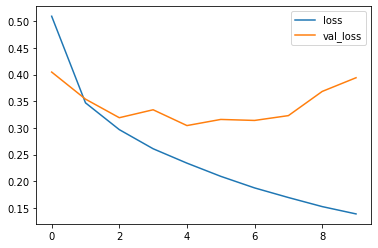

In [28]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

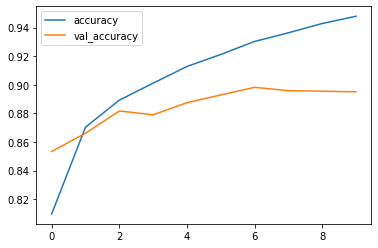

In [29]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [33]:
print(model.evaluate(x_test,y_test))
pred=model.predict(x_test).argmax(axis=1)


313/313 [==============================] - 2s 6ms/step - loss: 0.3942 - accuracy: 0.8951
[0.39420223236083984, 0.8950999975204468]
313/313 [==============================] - 2s 5ms/step


In [34]:
labels='''
t-shirt/top,
trouser,
pullover,
dress,
coat,
sandal,
shirt,
sneaker,
bag,
ankle-boot
'''.split()

Text(0.5, 1.0, 'True Label: shirt, Predicted: t-shirt/top,')

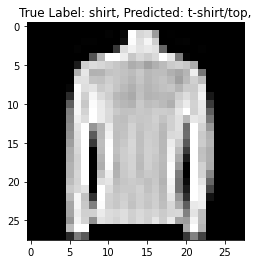

In [41]:
miss=np.where(pred!=y_test)[0]
i=np.random.choice(miss)
plt.imshow(x_test[i].reshape(28,28) , cmap='gray')
plt.title("True Label: %s Predicted: %s" %(labels[y_test[i]],labels[pred[i]]))
# print(labels[y_test[i]],labels[pred[i]])